This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [4]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [5]:
#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.16

folder = '10_05_18_coverage' #Folder in AWS S3 containing files to be analyzed
bucket = 'evanepst.data'
vids = 10
types = ['0_10xs', '0_15xs', '0_20xs', '0_25xs', '0_40xs', '0_50xs', '0_60xs', '0_75xs', '1xs', 'PSCOOH']

for typ in types:
    for num in range(1, vids+1):
    #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
        to_track.append('5mM_{}_XY{}'.format(typ, '%02d' % num))

In [31]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                         remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 5mM_0_10xs_XY01
Done with 5mM_0_10xs_XY02
Done with 5mM_0_10xs_XY03
Done with 5mM_0_10xs_XY04
Done with 5mM_0_10xs_XY05
Done with 5mM_0_10xs_XY06
Done with 5mM_0_10xs_XY07
Done with 5mM_0_10xs_XY08
Done with 5mM_0_10xs_XY09
Done with 5mM_0_10xs_XY10
Done with 5mM_0_15xs_XY01
Done with 5mM_0_15xs_XY02
Done with 5mM_0_15xs_XY03
Done with 5mM_0_15xs_XY04
Done with 5mM_0_15xs_XY05
Done with 5mM_0_15xs_XY06
Done with 5mM_0_15xs_XY07
Done with 5mM_0_15xs_XY08
Done with 5mM_0_15xs_XY09
Done with 5mM_0_15xs_XY10
Done with 5mM_0_20xs_XY01
Done with 5mM_0_20xs_XY02
Done with 5mM_0_20xs_XY03
Done with 5mM_0_20xs_XY04
Done with 5mM_0_20xs_XY05
Done with 5mM_0_20xs_XY06
Done with 5mM_0_20xs_XY07
Done with 5mM_0_20xs_XY08
Done with 5mM_0_20xs_XY09
Done with 5mM_0_20xs_XY10
Done with 5mM_0_25xs_XY01
Done with 5mM_0_25xs_XY02
Done with 5mM_0_25xs_XY03
Done with 5mM_0_25xs_XY04
Done with 5mM_0_25xs_XY05
Done with 5mM_0_25xs_XY06
Done with 5mM_0_25xs_XY07
Done with 5mM_0_25xs_XY08
Done with 5m

In [22]:
exps = []
for typ in types:
    to_avg = []
    for sample in to_track:
        if typ in sample:
            to_avg.append(sample)

    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=typ)
    exps.append(typ)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


In [23]:
exps

['0_10xs',
 '0_15xs',
 '0_20xs',
 '0_25xs',
 '0_40xs',
 '0_50xs',
 '0_60xs',
 '0_75xs',
 '1xs',
 'PSCOOH']

Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

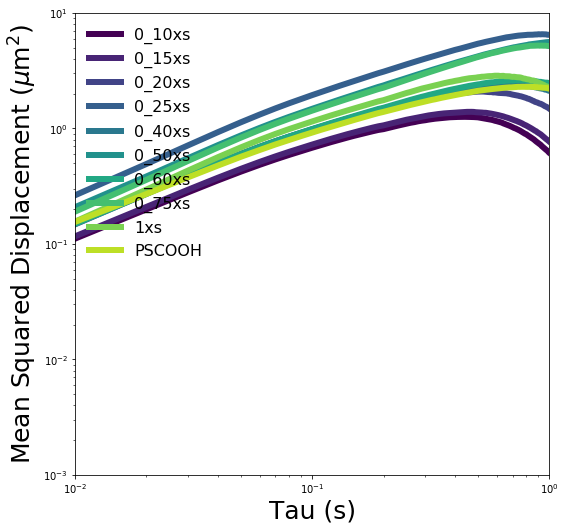

In [24]:
msd.plot_all_experiments(exps,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

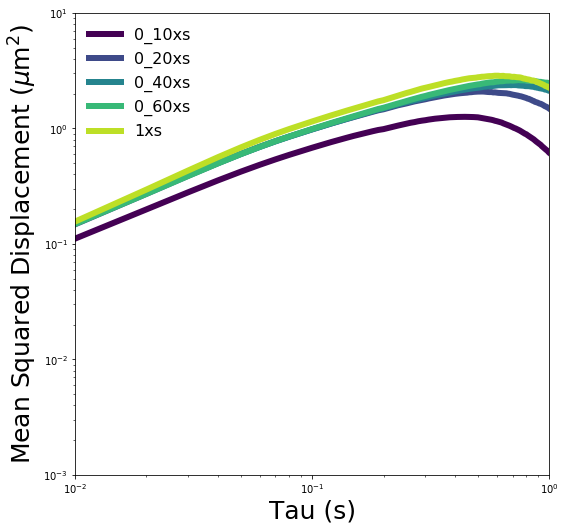

In [27]:
msd.plot_all_experiments(exps[::2],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

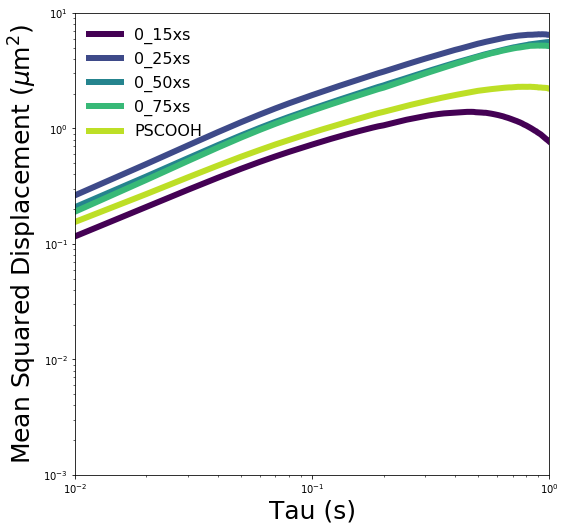

In [28]:
msd.plot_all_experiments(exps[1::2],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

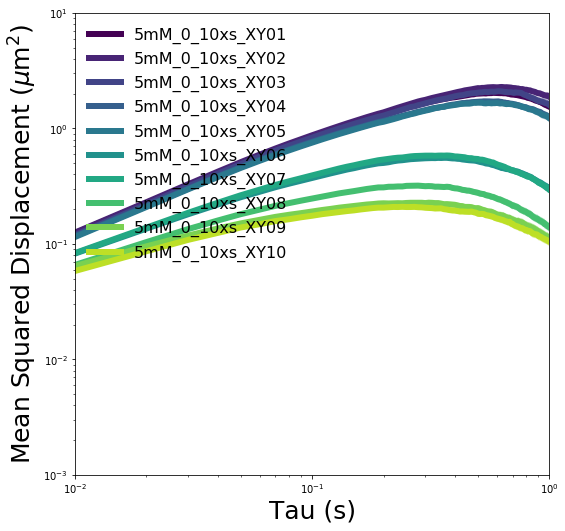

In [3]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

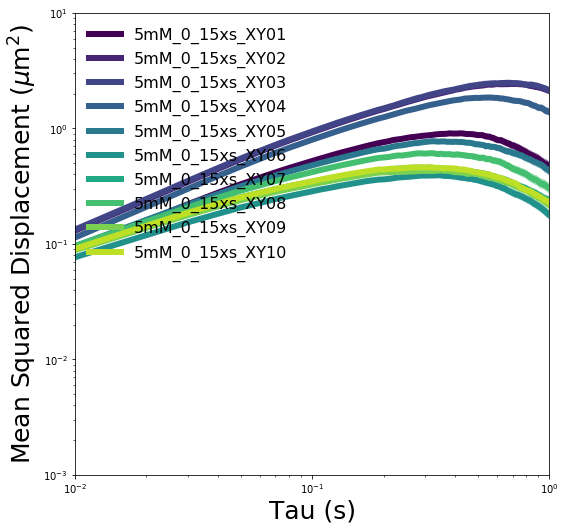

In [4]:
msd.plot_all_experiments(to_track[10:20], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

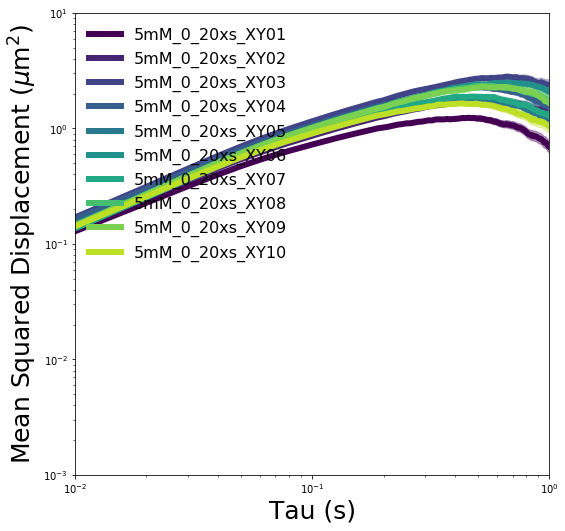

In [5]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

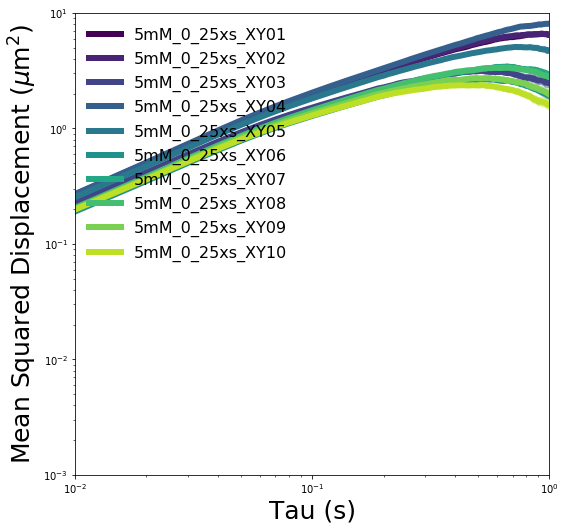

In [33]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

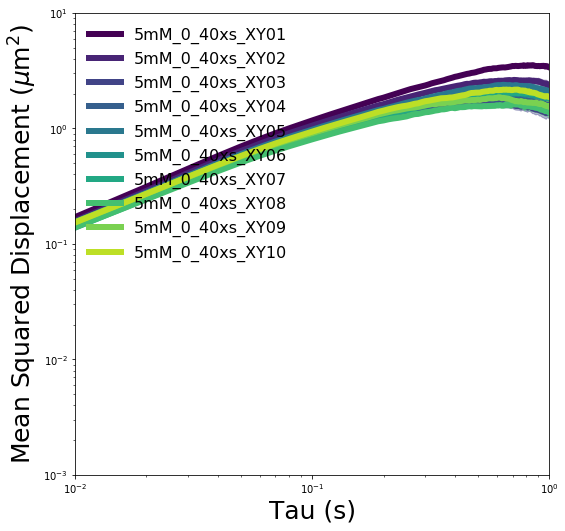

In [8]:
msd.plot_all_experiments(to_track[40:50], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

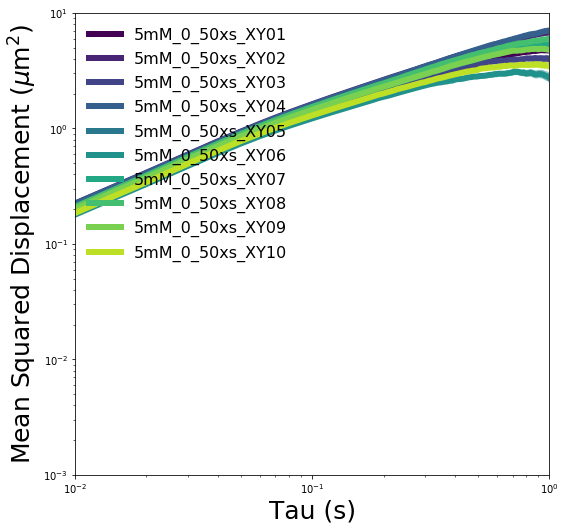

In [9]:
msd.plot_all_experiments(to_track[50:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

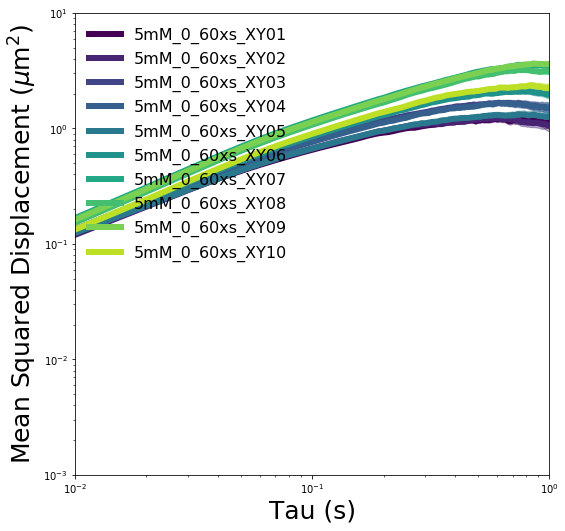

In [10]:
msd.plot_all_experiments(to_track[60:70], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

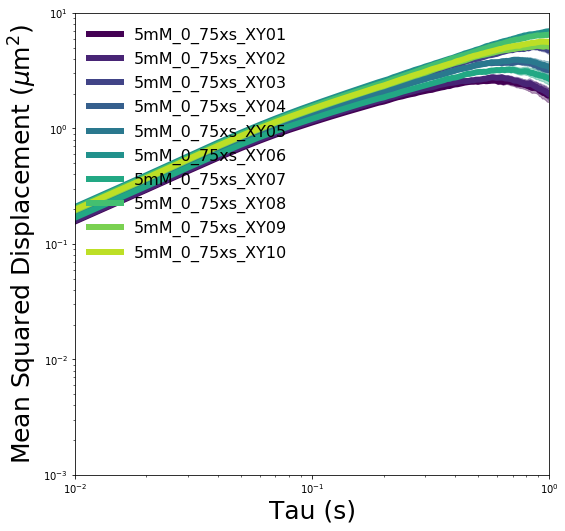

In [11]:
msd.plot_all_experiments(to_track[70:80], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

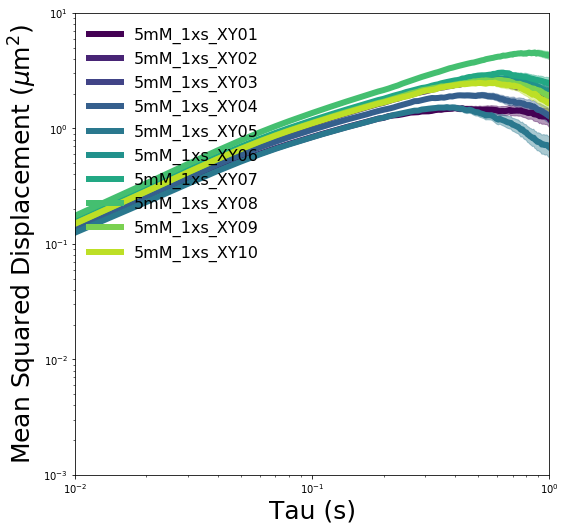

In [12]:
msd.plot_all_experiments(to_track[80:90], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

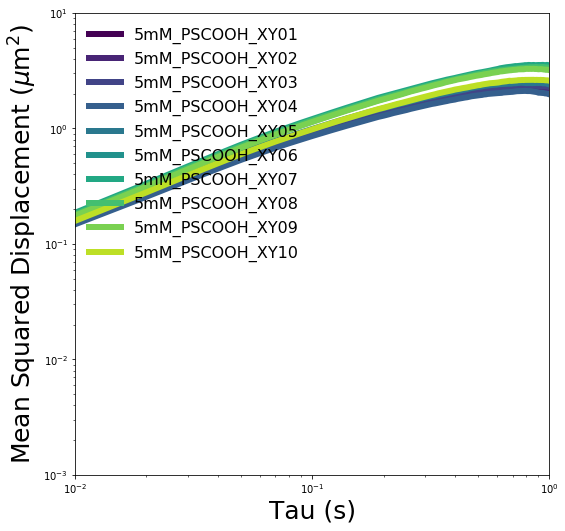

In [37]:
msd.plot_all_experiments(to_track[90:100], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

In [29]:
for i in range(0, 9, 2):
    print(i)

0
2
4
6
8


In [6]:
exps = types
for exp in exps:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, exp), 'geomean_{}.csv'.format(exp), bucket_name=bucket)

In [7]:
for exp in exps:
    geomean = np.genfromtxt('geomean_{}.csv'.format(exp))
    egeo = np.exp(geomean)
    print('D for {0}: {1:0.5f}'.format(exp, egeo[100]/4))

D for 0_10xs: 0.15369
D for 0_15xs: 0.19217
D for 0_20xs: 0.37108
D for 0_25xs: 1.61685
D for 0_40xs: 0.52925
D for 0_50xs: 1.40097
D for 0_60xs: 0.61746
D for 0_75xs: 1.29096
D for 1xs: 0.56400
D for PSCOOH: 0.00595
